In [1]:

# Load the dataset
import pandas as pd

df = pd.read_csv('dataset/Desharnais_expanded_300.csv')

# Display first 5 rows
print(df.head())
df.columns

   id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0   3        0        0           0       86       4    2964           190   
1  52       55        1           3       86      12    1047           130   
2  15       12        4           4       85       9    5984           228   
3  39       35       -1          -1       87       8    5344           260   
4  68       67        2           4       87      15    6894           325   

   Entities  PointsNonAdjust  Adjustment  PointsAjust  Language  
0       121              316          33          306         1  
1        84              221           4          140         2  
2       115              339          28          311         1  
3       148              402          24          362         1  
4       190              503          35          498         2  


Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

In [2]:
# Step: Data quality audit on the 300-row dataset (no changes yet)

import pandas as pd

# If your DataFrame is named df, skip the next line. Otherwise, load from CSV:
# df = pd.read_csv('dataset/Desharnais_expanded_300.csv')

# 1) Basic shape & dtypes
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)

# 2) Missing values per column
print("\nMissing values per column:\n", df.isnull().sum())

# 3) Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 4) Sanity checks for specific columns
non_negative_cols = ['TeamExp','ManagerExp','YearEnd','Length','Effort',
                     'Transactions','Entities','PointsNonAdjust','Adjustment',
                     'PointsAjust']
for col in non_negative_cols:
    if col in df.columns:
        n_neg = (df[col] < 0).sum()
        print(f"{col}: negatives = {n_neg}")

# 5) Check sentinel values like -1 in experience columns
for col in ['TeamExp','ManagerExp']:
    if col in df.columns:
        n_minus1 = (df[col] == -1).sum()
        print(f"{col}: -1 count = {n_minus1}")

# 6) Quick look at categorical distributions (e.g., Language)
if 'Language' in df.columns:
    print("\nLanguage value counts:\n", df['Language'].value_counts(dropna=False))


Shape: (300, 13)

Dtypes:
 id                 int64
Project            int64
TeamExp            int64
ManagerExp         int64
YearEnd            int64
Length             int64
Effort             int64
Transactions       int64
Entities           int64
PointsNonAdjust    int64
Adjustment         int64
PointsAjust        int64
Language           int64
dtype: object

Missing values per column:
 id                 0
Project            0
TeamExp            0
ManagerExp         0
YearEnd            0
Length             0
Effort             0
Transactions       0
Entities           0
PointsNonAdjust    0
Adjustment         0
PointsAjust        0
Language           0
dtype: int64

Number of duplicate rows: 0
TeamExp: negatives = 10
ManagerExp: negatives = 10
YearEnd: negatives = 0
Length: negatives = 0
Effort: negatives = 25
Transactions: negatives = 0
Entities: negatives = 0
PointsNonAdjust: negatives = 0
Adjustment: negatives = 0
PointsAjust: negatives = 0
TeamExp: -1 count = 10
ManagerExp: 

### Dataset Notes
- **Columns meaning**:  
  - `TeamExp`, `ManagerExp`: experience levels of team and manager.  
  - `Length`: project duration.  
  - `Effort`: target variable (person-hours/months).  
  - `Transactions`, `Entities`: project size indicators.  
  - `PointsNonAdjust`, `Adjustment`, `PointsAjust`: function points before/after adjustment.  
  - `Language`: programming language type (encoded).  

- **Dataset origin**:  
  The original **Desharnais dataset** had about **81 rows**.  
  We expanded it to **300 rows** using **simulation techniques** to make it larger.  
  Because of this artificial expansion, some **noise** was introduced.

- **Why negative values?**  
  - `-1` in `TeamExp` or `ManagerExp` = missing/unknown values in the original schema.  
  - Negative `Effort` is an artifact of the simulation noise (not realistic).  

- **Cleaning to be applied:**  
  - Remove rows with `TeamExp = -1` or `ManagerExp = -1`.  
  - Remove (or impute) rows with negative `Effort` to ensure realistic values.


In [3]:
# Step 1: Remove rows with -1 values in TeamExp or ManagerExp
df_cleaned = df[(df['TeamExp'] != -1) & (df['ManagerExp'] != -1)]

# Step 2: Remove rows with negative Effort
df_cleaned = df_cleaned[df_cleaned['Effort'] >= 0]

# Step 3: Print shape after cleaning
print("Shape after cleaning:", df_cleaned.shape)

# Step 4: Quick check to confirm no invalid values remain
print("Remaining negatives in TeamExp:", (df_cleaned['TeamExp'] < 0).sum())
print("Remaining negatives in ManagerExp:", (df_cleaned['ManagerExp'] < 0).sum())
print("Remaining negatives in Effort:", (df_cleaned['Effort'] < 0).sum())


Shape after cleaning: (258, 13)
Remaining negatives in TeamExp: 0
Remaining negatives in ManagerExp: 0
Remaining negatives in Effort: 0


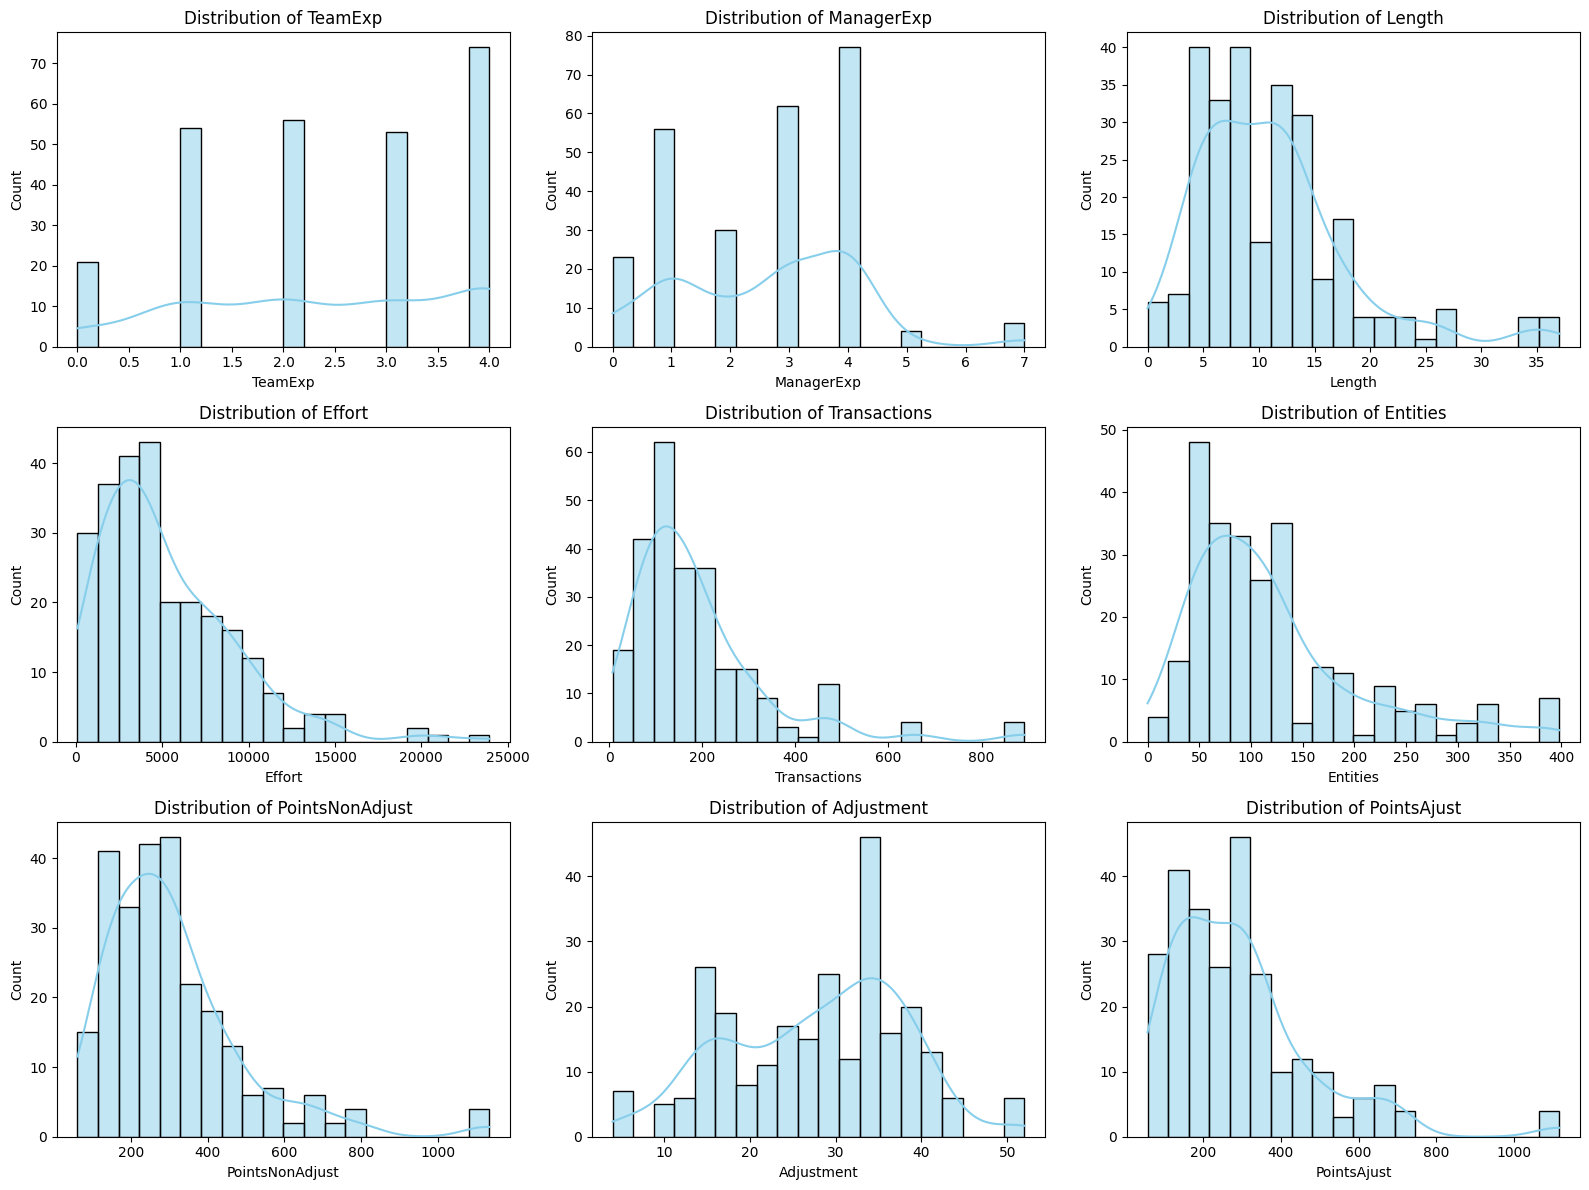

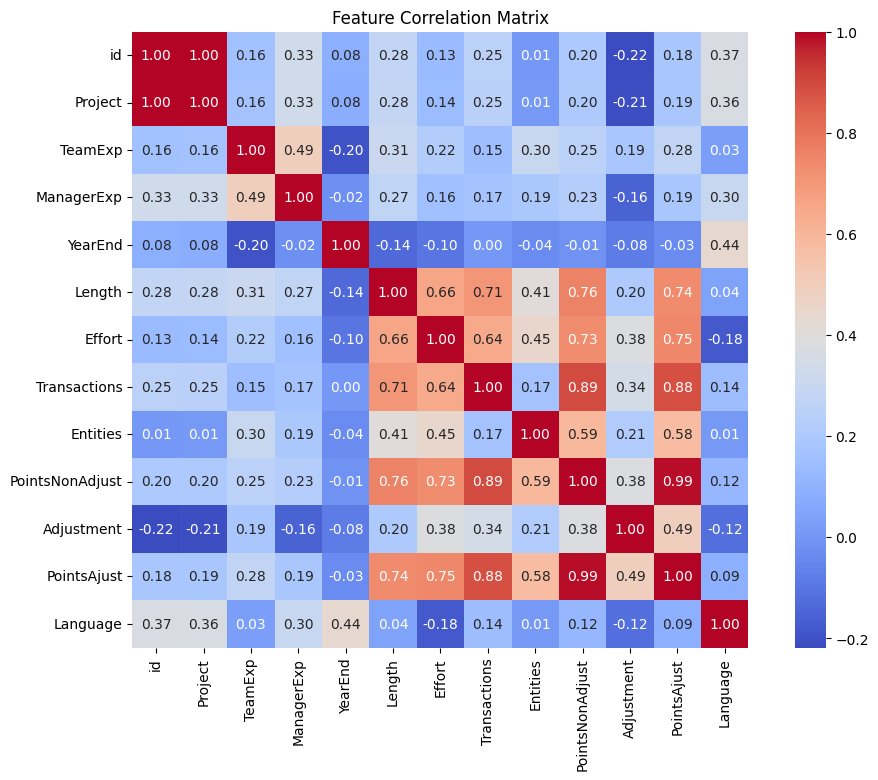

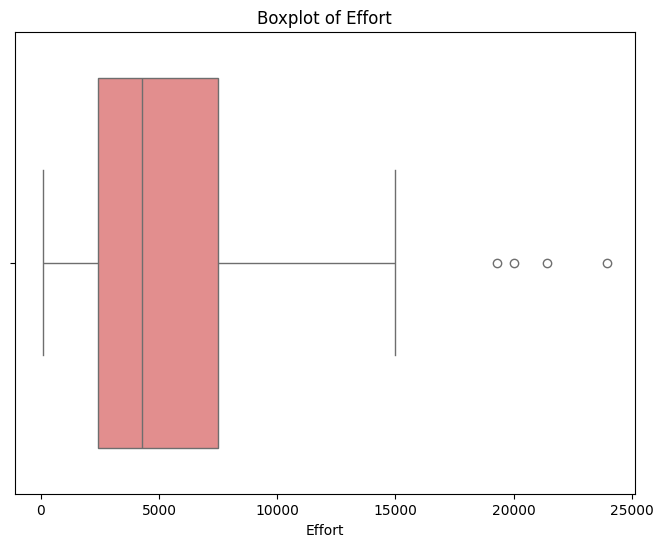

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot distributions of numeric features
numeric_cols = ['TeamExp', 'ManagerExp', 'Length', 'Effort',
                'Transactions', 'Entities', 'PointsNonAdjust',
                'Adjustment', 'PointsAjust']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Step 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 3: Boxplot for Effort (to check outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Effort'], color="lightcoral")
plt.title("Boxplot of Effort")
plt.show()


### Exploratory Data Analysis (EDA) Summary

1. **Feature Distributions**  
   - Most features (Effort, Transactions, Entities, Points) are right-skewed.  
   - TeamExp and ManagerExp values are concentrated in the lower range (0–4).  
   - Project Length is typically between 5–15 months.

2. **Correlation Matrix**  
   - Effort has strong positive correlations with:  
     - Transactions (0.64)  
     - PointsNonAdjust (0.73)  
     - PointsAjust (0.75)  
     - Length (0.66)  
   - TeamExp and ManagerExp show weak correlation with Effort, suggesting low predictive power.

3. **Outlier Detection (Boxplot of Effort)**  
   - Most projects fall between 2000–8000 effort hours, with a median around 4500.  
   - Projects above 20,000 hours appear as outliers and could negatively impact models.  
   - Handling strategies: removal or log transformation.

4. **Effort Distribution (Histogram + KDE)**  
   - The Effort variable is right-skewed.  
   - Majority of projects cluster around 4000–5000 hours.  
   - Long tail exists due to a few very large projects.  
   - Histogram shows the distribution shape, while Boxplot highlights extreme outliers.


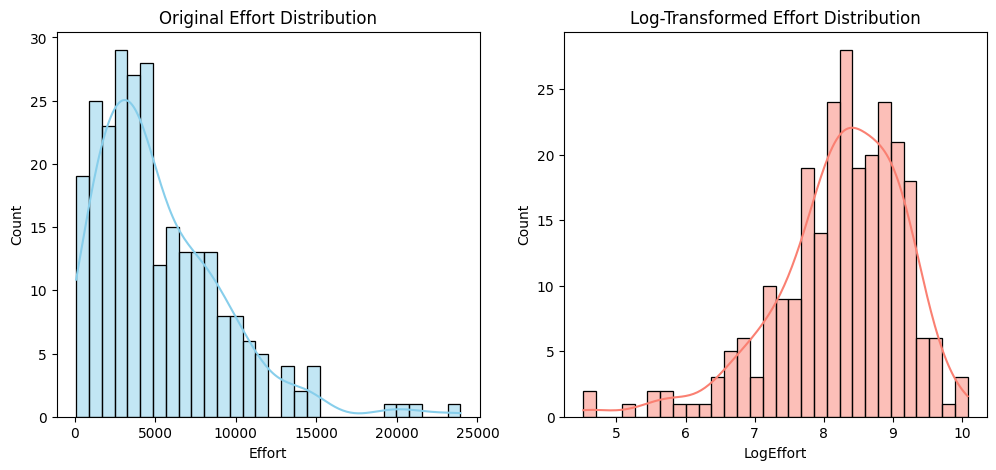

In [5]:
# Step 1: Log-transform on Effort
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with log-transformed Effort
df_cleaned['LogEffort'] = np.log1p(df_cleaned['Effort'])

# Plot distribution before vs after
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_cleaned['Effort'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Original Effort Distribution")

sns.histplot(df_cleaned['LogEffort'], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Log-Transformed Effort Distribution")

plt.show()


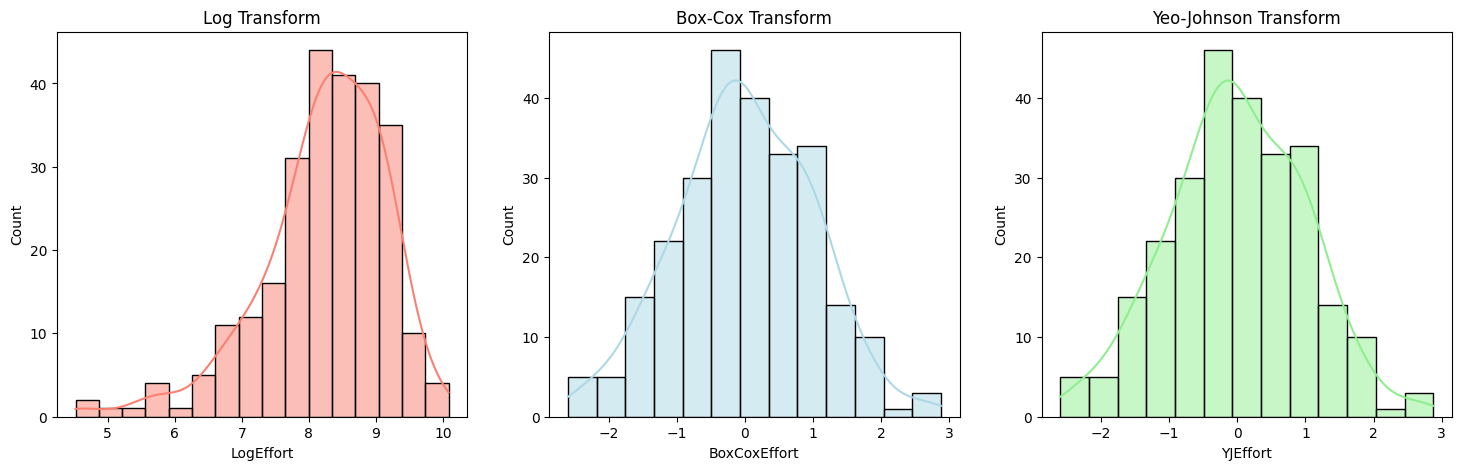

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Original Effort
effort = df_cleaned['Effort'].values.reshape(-1, 1)

# Log-transform
df_cleaned['LogEffort'] = np.log1p(df_cleaned['Effort'])

# Box-Cox
pt_boxcox = PowerTransformer(method='box-cox')
df_cleaned['BoxCoxEffort'] = pt_boxcox.fit_transform(effort)

# Yeo-Johnson
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df_cleaned['YJEffort'] = pt_yeojohnson.fit_transform(effort)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_cleaned['LogEffort'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title("Log Transform")

sns.histplot(df_cleaned['BoxCoxEffort'], kde=True, ax=axes[1], color='lightblue')
axes[1].set_title("Box-Cox Transform")

sns.histplot(df_cleaned['YJEffort'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title("Yeo-Johnson Transform")

plt.show()


### Target Variable Transformation

Since the target variable **Effort** was highly right-skewed, we applied different transformations to normalize it:

- **Log Transform**: Reduced skewness, but distribution was still right-skewed.
- **Box-Cox Transform**: Provided the most balanced and approximately normal distribution.
- **Yeo-Johnson Transform**: Also improved skewness, but slightly less symmetric compared to Box-Cox.

✅ Final Choice: **Box-Cox Transform** was selected as the best method for normalizing the target variable `Effort`.


In [7]:
# Step 1: Drop non-informative columns
df_features = df_cleaned.drop(columns=['id', 'Project'])

# Show the remaining columns
print("Remaining columns:", df_features.columns.tolist())


Remaining columns: ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language', 'LogEffort', 'BoxCoxEffort', 'YJEffort']


In [8]:
# OPTION B — Model on log-normalized target
# Keep y = LogEffort (better distribution), drop IDs and other target variants from X

drop_common = ['id', 'Project']

X_B = df_cleaned.drop(columns=drop_common + ['Effort', 'BoxCoxEffort', 'YJEffort', 'LogEffort'])
y_B = df_cleaned['LogEffort']

print("X_B shape:", X_B.shape)
print("y_B shape:", y_B.shape)
print("X_B columns:", X_B.columns.tolist())


X_B shape: (258, 10)
y_B shape: (258,)
X_B columns: ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language']


In [9]:
# Drop original Effort and other transformed versions
df_model = df_cleaned.drop(columns=['Effort', 'BoxCoxEffort', 'YJEffort'])

# Features (X) and Target (y)
X = df_model.drop(columns=['LogEffort'])
y = df_model['LogEffort']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (258, 12)
y shape: (258,)


In [10]:
# Step: Build X (features) and y (target=LogEffort) + Train/Test split

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 0) Ensure LogEffort exists
if 'LogEffort' not in df_cleaned.columns:
    df_cleaned = df_cleaned.copy()
    df_cleaned['LogEffort'] = np.log1p(df_cleaned['Effort'])

# 1) Drop non-informative and target variants from X
drop_common = ['id', 'Project']  # identifiers
drop_targets = [c for c in ['Effort', 'LogEffort', 'BoxCoxEffort', 'YJEffort'] if c in df_cleaned.columns]

X = df_cleaned.drop(columns=drop_common + drop_targets)  # features only
y = df_cleaned['LogEffort']                               # target (log scale)

print("X columns:", X.columns.tolist())
print("X shape:", X.shape, "| y shape:", y.shape)

# 2) Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

# 3) Quick sanity check: categorical distribution if 'Language' exists
if 'Language' in X.columns:
    print("\nLanguage distribution (train):")
    print(X_train['Language'].value_counts(dropna=False))


X columns: ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language']
X shape: (258, 10) | y shape: (258,)
Train shapes: (206, 10) (206,)
Test shapes: (52, 10) (52,)

Language distribution (train):
1    118
2     65
3     23
Name: Language, dtype: int64


In [11]:
# Baseline: Linear Regression with proper preprocessing + 5-fold CV (on TRAIN only)

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# We assume you already have: X_train, y_train, X_test, y_test (from previous step)

numeric_features = [c for c in X_train.columns if c != 'Language']
categorical_features = ['Language'] if 'Language' in X_train.columns else []

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

baseline_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', LinearRegression())
])

# Cross-validation on TRAIN
scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    baseline_pipe,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

# Aggregate CV metrics (convert negatives back to positives; RMSE = sqrt(MSE))
mae_cv = -cv_results['test_mae']
mse_cv = -cv_results['test_mse']
rmse_cv = np.sqrt(mse_cv)
r2_cv = cv_results['test_r2']

print(f"CV MAE (mean ± std): {mae_cv.mean():.4f} ± {mae_cv.std():.4f}")
print(f"CV RMSE (mean ± std): {rmse_cv.mean():.4f} ± {rmse_cv.std():.4f}")
print(f"CV R² (mean ± std): {r2_cv.mean():.4f} ± {r2_cv.std():.4f}")

# ---- Final holdout evaluation on TEST (fit on full TRAIN, then evaluate on TEST) ----
baseline_pipe.fit(X_train, y_train)
y_pred_log = baseline_pipe.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Log scale metrics ---
mae_log = mean_absolute_error(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)      # no squared=False in older sklearn
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_pred_log)
print(f"[Log scale]  MAE: {mae_log:.4f} | RMSE: {rmse_log:.4f} | R²: {r2_log:.4f}")

# --- Back-transform to original Effort units ---
y_test_effort = np.expm1(y_test)
y_pred_effort = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test_effort, y_pred_effort)
mse = mean_squared_error(y_test_effort, y_pred_effort)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_effort, y_pred_effort)
print(f"[Original Effort]  MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")


CV MAE (mean ± std): 0.5268 ± 0.0524
CV RMSE (mean ± std): 0.7156 ± 0.0648
CV R² (mean ± std): 0.4169 ± 0.0740
[Log scale]  MAE: 0.4867 | RMSE: 0.6506 | R²: 0.4170
[Original Effort]  MAE: 2161.56 | RMSE: 3256.59 | R²: 0.4464


In [12]:
# Step: Ridge Regression (with preprocessing + 5-fold CV on TRAIN) for LogEffort

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 0) Infer feature types from your existing X_train / X_test
numeric_features = [c for c in X_train.columns if c != 'Language']
categorical_features = ['Language'] if 'Language' in X_train.columns else []

# 1) Preprocess (scale numeric + one-hot encode categorical)
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# 2) Pipeline: preprocess -> Ridge
ridge_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', Ridge(random_state=42))
])

# 3) Hyperparameter grid for alpha (regularization strength)
param_grid = {
    'model__alpha': np.logspace(-3, 3, 13)  # 0.001 ... 1000
}

# 4) GridSearchCV on TRAIN (optimize RMSE on LOG scale)
gcv = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # we'll take sqrt to get RMSE
    n_jobs=-1,
    verbose=0
)

gcv.fit(X_train, y_train)

best_alpha = gcv.best_params_['model__alpha']
best_rmse_log_cv = np.sqrt(-gcv.best_score_)

print(f"Best alpha: {best_alpha}")
print(f"Best CV RMSE (log scale): {best_rmse_log_cv:.4f}")

# 5) Evaluate the best model on the HOLDOUT TEST
best_ridge = gcv.best_estimator_
y_pred_log = best_ridge.predict(X_test)

# Metrics on log scale
mae_log = mean_absolute_error(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)
print(f"[TEST - Log] MAE: {mae_log:.4f} | RMSE: {rmse_log:.4f} | R²: {r2_log:.4f}")

# Back-transform to original Effort
y_test_effort = np.expm1(y_test)
y_pred_effort = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test_effort, y_pred_effort)
rmse = np.sqrt(mean_squared_error(y_test_effort, y_pred_effort))
r2 = r2_score(y_test_effort, y_pred_effort)
print(f"[TEST - Original Effort] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")


Best alpha: 3.1622776601683795
Best CV RMSE (log scale): 0.7111
[TEST - Log] MAE: 0.4874 | RMSE: 0.6529 | R²: 0.4129
[TEST - Original Effort] MAE: 2171.90 | RMSE: 3227.33 | R²: 0.4563


In [13]:
# LassoCV on df_cleaned — compact & version-safe
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dfc = df_cleaned.copy()

# Target on log scale (use existing LogEffort if present)
y_log = dfc["LogEffort"].astype(float).to_numpy() if "LogEffort" in dfc.columns else np.log(dfc["Effort"].astype(float).to_numpy())

# Features (as you specified)
feat = ["TeamExp","ManagerExp","YearEnd","Length","Transactions","Entities",
        "PointsNonAdjust","Adjustment","PointsAjust","Language"]
X = dfc[feat].copy()

num = [c for c in feat if c != "Language"]
cat = ["Language"]

# Reuse existing split if already defined; otherwise create one
try:
    X_train, X_test, y_train_log, y_test_log
except NameError:
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

prep = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

pipe = Pipeline([
    ("prep", prep),
    ("model", LassoCV(alphas=np.logspace(-3, 2, 30), cv=5, random_state=42)),
])

pipe.fit(X_train, y_train_log)
y_pred_log = pipe.predict(X_test)

# Metrics (version-safe RMSE)
r2_log  = r2_score(y_test_log, y_pred_log)
mae_log = mean_absolute_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

y_test = np.exp(y_test_log); y_pred = np.exp(y_pred_log)
r2_org  = r2_score(y_test, y_pred)
mae_org = mean_absolute_error(y_test, y_pred)
rmse_org = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"[LassoCV] alpha={pipe.named_steps['model'].alpha_:.6f}")
print(f"[TEST-Log]  R2={r2_log:.4f}  MAE={mae_log:.4f}  RMSE={rmse_log:.4f}")
print(f"[TEST-Orig] R2={r2_org:.4f}  MAE={mae_org:.2f}  RMSE={rmse_org:.2f}")

# Top non-zero coefficients (just top-10 to keep it short)
ohe = pipe.named_steps["prep"].named_transformers_["cat"]
names = num + list(ohe.get_feature_names_out(cat))
coefs = pipe.named_steps["model"].coef_
nz = sorted([(n, c) for n, c in zip(names, coefs) if abs(c) > 1e-8], key=lambda x: abs(x[1]), reverse=True)
print("\nTop 10 |coef| features:")
for n, c in nz[:10]:
    print(f"{n:>20s} : {c:+.4f}")
print(f"\nSelected features: {len(nz)} / {len(names)}")


[LassoCV] alpha=0.004894
[TEST-Log]  R2=0.4174  MAE=0.4844  RMSE=0.6503
[TEST-Orig] R2=0.4704  MAE=2153.92  RMSE=3185.41

Top 10 |coef| features:
          Language_3 : -0.7783
          Adjustment : +0.2621
              Length : +0.2277
     PointsNonAdjust : +0.2113
          Language_1 : +0.2019
          ManagerExp : +0.1191
             YearEnd : +0.0758
            Entities : +0.0478
         PointsAjust : +0.0263
             TeamExp : -0.0220

Selected features: 10 / 12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035325793821172624, tolerance: 0.015056472856372967
  model = cd_fast.enet_coordinate_descent_gram(


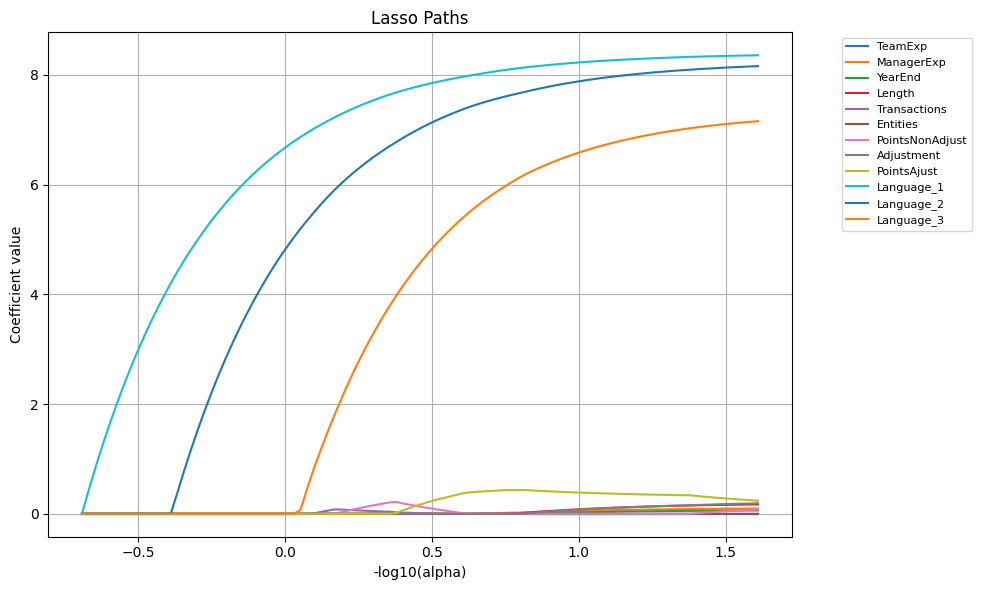

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

dfc = df_cleaned.copy()
y_log = dfc["LogEffort"].to_numpy() if "LogEffort" in dfc.columns else np.log(dfc["Effort"].to_numpy())

features = ["TeamExp","ManagerExp","YearEnd","Length","Transactions","Entities",
            "PointsNonAdjust","Adjustment","PointsAjust","Language"]
X = dfc[features].copy()

num = [c for c in features if c != "Language"]
cat = ["Language"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

X_proc = preprocess.fit_transform(X)
feature_names = num + list(preprocess.named_transformers_["cat"].get_feature_names_out(cat))

alphas_lasso, coefs_lasso, _ = lasso_path(X_proc, y_log, eps=5e-3)

plt.figure(figsize=(10,6))
for i, name in enumerate(feature_names):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso[i, :], label=name)

plt.xlabel("-log10(alpha)")
plt.ylabel("Coefficient value")
plt.title("Lasso Paths")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0), fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Stable LassoCV (compact)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dfc = df_cleaned.copy()
y_log = dfc["LogEffort"].to_numpy() if "LogEffort" in dfc.columns else np.log(dfc["Effort"].to_numpy())
feat = ["TeamExp","ManagerExp","YearEnd","Length","Transactions","Entities",
        "PointsNonAdjust","Adjustment","PointsAjust","Language"]
X = dfc[feat].copy()
num = [c for c in feat if c != "Language"]; cat = ["Language"]

try:
    X_train, X_test, y_train_log, y_test_log
except NameError:
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

prep = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

lasso = LassoCV(
    alphas=np.logspace(-4, 2, 60),  # denser grid
    cv=5, random_state=42, max_iter=10000, tol=1e-4
)

pipe_lasso = Pipeline([("prep", prep), ("model", lasso)])
pipe_lasso.fit(X_train, y_train_log)
y_pred_log = pipe_lasso.predict(X_test)

r2_log  = r2_score(y_test_log, y_pred_log)
mae_log = mean_absolute_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

y_test = np.exp(y_test_log); y_pred = np.exp(y_pred_log)
r2_org  = r2_score(y_test, y_pred)
mae_org = mean_absolute_error(y_test, y_pred)
rmse_org = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"[LassoCV stable] alpha={pipe_lasso.named_steps['model'].alpha_:.6f}")
print(f"[TEST-Log]  R2={r2_log:.4f}  MAE={mae_log:.4f}  RMSE={rmse_log:.4f}")
print(f"[TEST-Orig] R2={r2_org:.4f}  MAE={mae_org:.2f}  RMSE={rmse_org:.2f}")


[LassoCV stable] alpha=0.004238
[TEST-Log]  R2=0.4169  MAE=0.4849  RMSE=0.6506
[TEST-Orig] R2=0.4673  MAE=2155.91  RMSE=3194.78


In [16]:
# ElasticNetCV (compact) — compare with Lasso
import numpy as np
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(
    l1_ratio=[0.2, 0.4, 0.6, 0.8, 1.0],      # 1.0 == Lasso
    alphas=np.logspace(-4, 2, 60),
    cv=5, random_state=42, max_iter=10000, tol=1e-4
)

pipe_enet = Pipeline([("prep", prep), ("model", enet)])
pipe_enet.fit(X_train, y_train_log)
y_pred_log_e = pipe_enet.predict(X_test)

r2_log_e  = r2_score(y_test_log, y_pred_log_e)
mae_log_e = mean_absolute_error(y_test_log, y_pred_log_e)
rmse_log_e = np.sqrt(mean_squared_error(y_test_log, y_pred_log_e))

y_pred_e = np.exp(y_pred_log_e)
r2_org_e  = r2_score(y_test, y_pred_e)
mae_org_e = mean_absolute_error(y_test, y_pred_e)
rmse_org_e = np.sqrt(mean_squared_error(y_test, y_pred_e))

print(f"[ElasticNetCV] l1_ratio={pipe_enet.named_steps['model'].l1_ratio_:.2f}  alpha={pipe_enet.named_steps['model'].alpha_:.6f}")
print(f"[TEST-Log]  R2={r2_log_e:.4f}  MAE={mae_log_e:.4f}  RMSE={rmse_log_e:.4f}")
print(f"[TEST-Orig] R2={r2_org_e:.4f}  MAE={mae_org_e:.2f}  RMSE={rmse_org_e:.2f}")


[ElasticNetCV] l1_ratio=0.20  alpha=0.013664
[TEST-Log]  R2=0.4141  MAE=0.4860  RMSE=0.6522
[TEST-Orig] R2=0.4643  MAE=2166.13  RMSE=3203.49


In [17]:
# Step: Reduced linear models with selected features (compact)
# English comments inside; Persian explanation outside.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dfc = df_cleaned.copy()
y_log = dfc["LogEffort"].to_numpy() if "LogEffort" in dfc.columns else np.log(dfc["Effort"].to_numpy())

# Selected features based on your Lasso results
feat_sel = ["Adjustment","Length","PointsNonAdjust","ManagerExp","YearEnd","Language"]
X = dfc[feat_sel].copy()

num = [c for c in feat_sel if c != "Language"]
cat = ["Language"]

try:
    X_train, X_test, y_train_log, y_test_log
except NameError:
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

pre = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# Define three models to compare
models = {
    "Linear": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-4, 3, 50), cv=5),
    "LassoCV": LassoCV(alphas=np.logspace(-4, 2, 60), cv=5, random_state=42, max_iter=10000, tol=1e-4),
}

results = []
for name, est in models.items():
    pipe = Pipeline([("pre", pre), ("model", est)])
    pipe.fit(X_train, y_train_log)
    y_pred_log = pipe.predict(X_test)
    # log-scale metrics
    r2_l = r2_score(y_test_log, y_pred_log)
    mae_l = mean_absolute_error(y_test_log, y_pred_log)
    rmse_l = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
    # original-scale metrics
    y_test = np.exp(y_test_log); y_pred = np.exp(y_pred_log)
    r2_o = r2_score(y_test, y_pred)
    mae_o = mean_absolute_error(y_test, y_pred)
    rmse_o = np.sqrt(mean_squared_error(y_test, y_pred))
    # CV stability on train (R2 log-scale)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipe, X_train, y_train_log, cv=cv, scoring="r2")
    results.append([name, r2_l, mae_l, rmse_l, r2_o, mae_o, rmse_o, cv_scores.mean(), cv_scores.std()])

res_df = pd.DataFrame(results, columns=[
    "Model","R2_Log","MAE_Log","RMSE_Log","R2_Orig","MAE_Orig","RMSE_Orig","CV_R2_mean","CV_R2_std"
]).sort_values("R2_Orig", ascending=False)
res_df


,Model,R2_Log,MAE_Log,RMSE_Log,R2_Orig,MAE_Orig,RMSE_Orig,CV_R2_mean,CV_R2_std
1,RidgeCV,0.417816,0.485153,0.650120,0.384325,2203.725940,3434.453118,0.399087,0.087424
2,LassoCV,0.420147,0.483774,0.648817,0.370876,2198.370494,3471.760032,0.399380,0.089903
0,Linear,0.416984,0.486175,0.650585,0.344028,2211.767604,3545.067101,0.400915,0.090503


# 🔎 Current Status and Next Steps (Linear Models + Feature Engineering)

## ✅ What we have done so far
- Cleaned dataset (`df_cleaned`).
- Applied transformations: used **LogEffort** as target.
- Built baseline models: Linear Regression, Ridge, Lasso, ElasticNet.
- Performance with full features: **R² ~0.46–0.47** on test set.
- Lasso revealed **key features**:
  - Strong: `Language`, `Adjustment`, `Length`, `PointsNonAdjust`
  - Medium: `ManagerExp`, `YearEnd`
  - Weak/Redundant: `Transactions`, `Entities`, `TeamExp`, `PointsAjust`

## ⚖️ Reduced model vs Full model
- Reduced model (only key features) → Simpler but **R² dropped** to ~0.38.
- Conclusion: Good for **interpretation**, but **not good enough for prediction**.
- Decision: Stay with the **full model** for prediction.

## 🎯 Next strategy
To improve predictive accuracy, we will:
1. Keep the **full set of features**.
2. Add **interaction terms** between key variables to capture nonlinear effects.
   - Example interactions:
     - `Length × Adjustment` → project length depending on complexity.
     - `PointsNonAdjust × Language` → project size depending on language type.
     - `ManagerExp × TeamExp` → combined experience effect.
     - (Optionally) `YearEnd × Language` → technology effect over time.
3. Refit models (Linear, Ridge, Lasso/ElasticNet) with these engineered features.
4. Compare metrics to see if R² improves beyond ~0.47.

## 🔑 Summary
- Feature selection showed us which variables matter most.
- Reduced model is interpretable but loses predictive power.
- Next step: **Feature engineering (interactions)** on the **full model** to increase accuracy while retaining interpretability.


In [18]:
# Step: Create simple numeric interactions on the full dataset (no modeling yet)
# -----------------------------------------------------------------------------
# Requirements:
# - Assumes a cleaned DataFrame named `df_cleaned`
# - Target remains LogEffort (already present or computed later in modeling step)
#
# What this cell does:
# 1) Creates a copy of df_cleaned
# 2) Adds a few numeric × numeric interaction features:
#       - Length × Adjustment
#       - PointsNonAdjust × Adjustment
#       - ManagerExp × TeamExp
# 3) Prepares a feature list (original + interactions) for the next step

import pandas as pd

if 'df_cleaned' not in globals():
    raise NameError("`df_cleaned` not found. Please ensure your cleaned DataFrame is available as `df_cleaned`.")

dfi = df_cleaned.copy()

# --- Create interaction features (numeric × numeric)
dfi["Length_x_Adjustment"] = dfi["Length"] * dfi["Adjustment"]
dfi["PointsNonAdjust_x_Adjustment"] = dfi["PointsNonAdjust"] * dfi["Adjustment"]
dfi["ManagerExp_x_TeamExp"] = dfi["ManagerExp"] * dfi["TeamExp"]

# --- Define the base feature set you used before
base_features = [
    "TeamExp","ManagerExp","YearEnd","Length","Transactions",
    "Entities","PointsNonAdjust","Adjustment","PointsAjust","Language"
]

# --- Build the full feature list (original + interactions)
interaction_features = [
    "Length_x_Adjustment",
    "PointsNonAdjust_x_Adjustment",
    "ManagerExp_x_TeamExp",
]
feature_cols_full = base_features + interaction_features

# Basic sanity checks / preview
missing_in_base = [c for c in base_features if c not in dfi.columns]
if missing_in_base:
    raise KeyError(f"Missing expected base feature(s) in dfi: {missing_in_base}")

print("[INFO] Added interaction features:", interaction_features)
print("[INFO] Total features (incl. interactions):", len(feature_cols_full))
print("[INFO] Sample rows with new interaction columns:")
display(dfi[interaction_features + ["Length","Adjustment","PointsNonAdjust","ManagerExp","TeamExp"]].head(8))
print(feature_cols_full)

[INFO] Added interaction features: ['Length_x_Adjustment', 'PointsNonAdjust_x_Adjustment', 'ManagerExp_x_TeamExp']
[INFO] Total features (incl. interactions): 13
[INFO] Sample rows with new interaction columns:


,Length_x_Adjustment,PointsNonAdjust_x_Adjustment,ManagerExp_x_TeamExp,Length,Adjustment,PointsNonAdjust,ManagerExp,TeamExp
0,132,10428,0,4,33,316,0,0
1,48,884,3,12,4,221,3,1
2,252,9492,16,9,28,339,4,4
4,525,17605,8,15,35,503,4,2
5,360,7710,3,12,30,257,1,3
6,680,10320,2,17,40,258,1,2
7,222,10878,0,6,37,294,0,2
8,169,2678,6,13,13,206,3,2


['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language', 'Length_x_Adjustment', 'PointsNonAdjust_x_Adjustment', 'ManagerExp_x_TeamExp']


In [19]:
# Fresh rebuild of interactions + fresh train/test split + modeling
# ---------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 0) Base DF
if 'df_cleaned' not in globals():
    raise NameError("`df_cleaned` not found. Please ensure it exists.")

# 1) Rebuild interactions from scratch (overwrite if present)
dfi = df_cleaned.copy()
dfi["Length_x_Adjustment"] = dfi["Length"] * dfi["Adjustment"]
dfi["PointsNonAdjust_x_Adjustment"] = dfi["PointsNonAdjust"] * dfi["Adjustment"]
dfi["ManagerExp_x_TeamExp"] = dfi["ManagerExp"] * dfi["TeamExp"]

# 2) Feature list
base_features = [
    "TeamExp","ManagerExp","YearEnd","Length","Transactions",
    "Entities","PointsNonAdjust","Adjustment","PointsAjust","Language"
]
interaction_features = [
    "Length_x_Adjustment",
    "PointsNonAdjust_x_Adjustment",
    "ManagerExp_x_TeamExp",
]
feature_cols_full = base_features + interaction_features

# 3) Target + Design matrix
y_log = dfi["LogEffort"].to_numpy() if "LogEffort" in dfi.columns else np.log(dfi["Effort"].to_numpy())
X = dfi[feature_cols_full].copy()

# 4) ALWAYS make a fresh split (do not reuse old X_train/X_test)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 5) Preprocess
num = [c for c in feature_cols_full if c != "Language"]
cat = ["Language"]
pre = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# 6) Models
models = {
    "Linear": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-4, 3, 50), cv=5),
    "LassoCV": LassoCV(alphas=np.logspace(-4, 2, 60), cv=5, random_state=42, max_iter=10000, tol=1e-4),
}

# 7) Train/evaluate
results = []
for name, est in models.items():
    pipe = Pipeline([("pre", pre), ("model", est)])
    pipe.fit(X_train, y_train_log)
    y_pred_log = pipe.predict(X_test)

    r2_l  = r2_score(y_test_log, y_pred_log)
    mae_l = mean_absolute_error(y_test_log, y_pred_log)
    rmse_l = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

    y_test = np.exp(y_test_log); y_pred = np.exp(y_pred_log)
    r2_o  = r2_score(y_test, y_pred)
    mae_o = mean_absolute_error(y_test, y_pred)
    rmse_o = np.sqrt(mean_squared_error(y_test, y_pred))

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipe, X_train, y_train_log, cv=cv, scoring="r2")
    results.append([name, r2_l, mae_l, rmse_l, r2_o, mae_o, rmse_o, cv_scores.mean(), cv_scores.std()])

res_int = pd.DataFrame(results, columns=[
    "Model","R2_Log","MAE_Log","RMSE_Log",
    "R2_Orig","MAE_Orig","RMSE_Orig",
    "CV_R2_mean","CV_R2_std"
]).sort_values("R2_Orig", ascending=False)

print("[INFO] Columns present in X:", list(X.columns))
res_int


[INFO] Columns present in X: ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language', 'Length_x_Adjustment', 'PointsNonAdjust_x_Adjustment', 'ManagerExp_x_TeamExp']


,Model,R2_Log,MAE_Log,RMSE_Log,R2_Orig,MAE_Orig,RMSE_Orig,CV_R2_mean,CV_R2_std
0,Linear,0.410997,0.477647,0.653916,0.560138,2114.114137,2902.954203,0.335713,0.140801
1,RidgeCV,0.408528,0.484407,0.655286,0.515773,2143.473959,3045.834229,0.377773,0.097131
2,LassoCV,0.419145,0.482436,0.649378,0.486698,2147.369205,3135.944815,0.378511,0.093164


# 📊 Results with Interaction Features (13 total)

## Test Metrics (with interactions)
| Model    | R2_Log | R2_Orig | MAE_Orig | RMSE_Orig |
|----------|--------|---------|----------|-----------|
| Linear   | 0.411  | **0.560** | 2114     | 2903      |
| RidgeCV  | 0.409  | 0.516   | 2143     | 3046      |
| LassoCV  | 0.419  | 0.487   | 2147     | 3136      |

---

## 🔑 Interpretation
- **Linear Regression** (no regularization) improved significantly:
  - On log scale: R² ≈ 0.41 (similar to before).
  - On original scale: **R² = 0.56**, a major improvement over previous ~0.46–0.47.
  - Errors also decreased (MAE ~2114 vs ~2200, RMSE ~2903 vs ~3185).

- **RidgeCV**:
  - R² = 0.52 on original scale, slightly weaker than plain Linear but still better than earlier models.

- **LassoCV**:
  - R² = 0.49 on original scale, improved from ~0.47 but not as strong as Linear or Ridge.

---

## 📌 Key Conclusion
- Adding **interaction features** clearly helped:
  - Plain Linear with interactions reached **R² = 0.56**, the best so far.
  - Ridge and Lasso improved compared to earlier, but regularization penalized some useful interaction effects.

---

## 🎯 Next Options
1. Analyze **standardized coefficients** of Linear + interactions to interpret which features and interactions matter most.
2. Add more targeted interactions (e.g., `Language × PointsNonAdjust`) to check for further improvements.
3. Move to **non-linear models** (RandomForest, XGBoost) for comparison.


In [20]:
# Step: Standardized coefficients for Linear + Interactions
# ---------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Features and target
X = dfi[feature_cols_full].copy()
y_log = dfi["LogEffort"].to_numpy() if "LogEffort" in dfi.columns else np.log(dfi["Effort"].to_numpy())

num = [c for c in feature_cols_full if c != "Language"]
cat = ["Language"]

# Preprocessor: scale numeric + one-hot encode categorical
pre = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# Fit Linear Regression on all data
pipe_lin = Pipeline([("pre", pre), ("model", LinearRegression())])
pipe_lin.fit(X, y_log)

# Extract feature names after preprocessing
ohe = pipe_lin.named_steps["pre"].named_transformers_["cat"]
feat_names = num + list(ohe.get_feature_names_out(cat))

# Get standardized coefficients
coefs = pipe_lin.named_steps["model"].coef_
coef_df = pd.DataFrame({
    "feature": feat_names,
    "coef_std": coefs
}).sort_values("coef_std", key=np.abs, ascending=False)

print("Standardized coefficients (sorted by absolute value):")
display(coef_df)


Standardized coefficients (sorted by absolute value):


,feature,coef_std
8,PointsAjust,1.801108
4,Transactions,-1.292104
6,PointsNonAdjust,0.839865
10,PointsNonAdjust_x_Adjustment,-0.819045
5,Entities,-0.715903
14,Language_3,-0.668530
12,Language_1,0.392316
7,Adjustment,0.347753
13,Language_2,0.276213
3,Length,0.225281


In [21]:
# Compare Linear (with StandardScaler + OneHot) vs RandomForest (no scaling, only OneHot)
# --------------------------------------------------------------------------------------
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 0) Base DF: ensure exists
if 'df_cleaned' not in globals():
    raise NameError("`df_cleaned` not found. Please ensure it exists.")

# 1) Rebuild interactions from scratch to be safe
dfi = df_cleaned.copy()
dfi["Length_x_Adjustment"] = dfi["Length"] * dfi["Adjustment"]
dfi["PointsNonAdjust_x_Adjustment"] = dfi["PointsNonAdjust"] * dfi["Adjustment"]
dfi["ManagerExp_x_TeamExp"] = dfi["ManagerExp"] * dfi["TeamExp"]

base_features = [
    "TeamExp","ManagerExp","YearEnd","Length","Transactions",
    "Entities","PointsNonAdjust","Adjustment","PointsAjust","Language"
]
interaction_features = [
    "Length_x_Adjustment",
    "PointsNonAdjust_x_Adjustment",
    "ManagerExp_x_TeamExp",
]
feature_cols_full = base_features + interaction_features

# 2) Target on log scale (consistent with prior steps)
y_log = dfi["LogEffort"].to_numpy() if "LogEffort" in dfi.columns else np.log(dfi["Effort"].to_numpy())
X = dfi[feature_cols_full].copy()

# 3) Fresh split (no reuse)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 4) Preprocessors
num = [c for c in feature_cols_full if c != "Language"]
cat = ["Language"]

# For Linear model: scale numeric + one-hot categorical
pre_linear = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# For RandomForest: passthrough numeric (no scaling) + one-hot categorical
pre_rf = ColumnTransformer([
    ("num", "passthrough", num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# 5) Pipelines
pipe_linear = Pipeline([
    ("pre", pre_linear),
    ("model", LinearRegression())
])

pipe_rf = Pipeline([
    ("pre", pre_rf),
    ("model", RandomForestRegressor(
        n_estimators=500, random_state=42, n_jobs=-1, max_depth=None
    ))
])

# 6) Train & evaluate helper
def eval_pipe(name, pipe):
    pipe.fit(X_train, y_train_log)
    y_pred_log = pipe.predict(X_test)

    # log-scale metrics
    r2_l  = r2_score(y_test_log, y_pred_log)
    mae_l = mean_absolute_error(y_test_log, y_pred_log)
    rmse_l = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

    # original-scale metrics (invert log)
    y_test = np.exp(y_test_log)
    y_pred = np.exp(y_pred_log)
    r2_o  = r2_score(y_test, y_pred)
    mae_o = mean_absolute_error(y_test, y_pred)
    rmse_o = np.sqrt(mean_squared_error(y_test, y_pred))

    # 5-fold CV on train (log-scale R2) for stability check
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipe, X_train, y_train_log, cv=cv, scoring="r2")

    return [name, r2_l, mae_l, rmse_l, r2_o, mae_o, rmse_o, cv_scores.mean(), cv_scores.std()]

# 7) Run both
rows = []
rows.append(eval_pipe("Linear+Scaler+OHE", pipe_linear))
rows.append(eval_pipe("RandomForest+OHE(no-scale)", pipe_rf))

res_cmp = pd.DataFrame(rows, columns=[
    "Model","R2_Log","MAE_Log","RMSE_Log",
    "R2_Orig","MAE_Orig","RMSE_Orig",
    "CV_R2_mean","CV_R2_std"
]).sort_values("R2_Orig", ascending=False)

res_cmp


,Model,R2_Log,MAE_Log,RMSE_Log,R2_Orig,MAE_Orig,RMSE_Orig,CV_R2_mean,CV_R2_std
0,Linear+Scaler+OHE,0.410997,0.477647,0.653916,0.560138,2114.114137,2902.954203,0.335713,0.140801
1,RandomForest+OHE(no-scale),0.256934,0.536222,0.734475,0.529801,2304.340206,3001.391089,0.159949,0.268081


In [22]:
# Step: Create additional engineered features
# -------------------------------------------
import numpy as np

df_fe = dfi.copy()  # start from previous df with interactions

# 1) Transactions per Entity (handle division by zero safely)
df_fe["Trans_per_Entity"] = df_fe["Transactions"] / df_fe["Entities"].replace(0, np.nan)
df_fe["Trans_per_Entity"] = df_fe["Trans_per_Entity"].fillna(0)

# 2) Points Ratio (Adjusted / NonAdjusted)
df_fe["Points_Ratio"] = df_fe["PointsAjust"] / df_fe["PointsNonAdjust"].replace(0, np.nan)
df_fe["Points_Ratio"] = df_fe["Points_Ratio"].fillna(0)

# 3) Team-Manager Balance (ManagerExp / TeamExp)
df_fe["TeamMgr_Balance"] = df_fe["ManagerExp"] / (df_fe["TeamExp"] + 1)

# --- Update feature list
extra_features = ["Trans_per_Entity","Points_Ratio","TeamMgr_Balance"]
feature_cols_extended = feature_cols_full + extra_features

print("[INFO] Added engineered features:", extra_features)
print("[INFO] Total features now:", len(feature_cols_extended))
df_fe[extra_features].head(10)


[INFO] Added engineered features: ['Trans_per_Entity', 'Points_Ratio', 'TeamMgr_Balance']
[INFO] Total features now: 16


,Trans_per_Entity,Points_Ratio,TeamMgr_Balance
0,1.570248,0.968354,0.000000
1,1.547619,0.633484,1.500000
2,1.982609,0.917404,0.800000
4,1.710526,0.990060,1.333333
5,1.853933,1.003891,0.250000
6,1.303571,1.050388,0.333333
7,0.289256,1.027211,0.000000
8,1.762500,0.830097,1.000000
9,1.439024,1.019753,0.800000
10,1.885714,0.907591,1.500000


In [23]:
# Step: Modeling with extended features (16 total)
# ------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 0) Base data
dfm = df_fe.copy()   # df_fe = dataframe with engineered features
y_log = dfm["LogEffort"].to_numpy() if "LogEffort" in dfm.columns else np.log(dfm["Effort"].to_numpy())
X = dfm[feature_cols_extended].copy()

# 1) Fresh split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 2) Columns by type
num = [c for c in feature_cols_extended if c != "Language"]
cat = ["Language"]

# 3) Preprocessors
pre_linear = ColumnTransformer([
    ("num", StandardScaler(), num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

pre_rf = ColumnTransformer([
    ("num", "passthrough", num),
    ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat),
])

# 4) Models
models = {
    "Linear": Pipeline([("pre", pre_linear), ("model", LinearRegression())]),
    "RidgeCV": Pipeline([("pre", pre_linear), ("model", RidgeCV(alphas=np.logspace(-4,3,50), cv=5))]),
    "LassoCV": Pipeline([("pre", pre_linear), ("model", LassoCV(alphas=np.logspace(-4,2,60), cv=5,
                                                               random_state=42, max_iter=10000, tol=1e-4))]),
    "RandomForest": Pipeline([("pre", pre_rf), ("model", RandomForestRegressor(
        n_estimators=500, random_state=42, n_jobs=-1, max_depth=None
    ))]),
}

# 5) Evaluation loop
results = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train_log)
    y_pred_log = pipe.predict(X_test)

    # Log scale metrics
    r2_l  = r2_score(y_test_log, y_pred_log)
    mae_l = mean_absolute_error(y_test_log, y_pred_log)
    rmse_l = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

    # Original Effort scale
    y_test = np.exp(y_test_log); y_pred = np.exp(y_pred_log)
    r2_o  = r2_score(y_test, y_pred)
    mae_o = mean_absolute_error(y_test, y_pred)
    rmse_o = np.sqrt(mean_squared_error(y_test, y_pred))

    # CV on train (log-scale R2)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipe, X_train, y_train_log, cv=cv, scoring="r2")

    results.append([name, r2_l, mae_l, rmse_l, r2_o, mae_o, rmse_o, cv_scores.mean(), cv_scores.std()])

res_ext = pd.DataFrame(results, columns=[
    "Model","R2_Log","MAE_Log","RMSE_Log",
    "R2_Orig","MAE_Orig","RMSE_Orig",
    "CV_R2_mean","CV_R2_std"
]).sort_values("R2_Orig", ascending=False)

res_ext


,Model,R2_Log,MAE_Log,RMSE_Log,R2_Orig,MAE_Orig,RMSE_Orig,CV_R2_mean,CV_R2_std
0,Linear,0.431240,0.462526,0.642581,0.586206,2039.885055,2815.618383,0.280603,0.179685
3,RandomForest,0.236030,0.531144,0.744735,0.555612,2225.291393,2917.850300,0.163912,0.258730
1,RidgeCV,0.417877,0.476160,0.650086,0.532576,2118.324362,2992.519608,0.288655,0.221321
2,LassoCV,0.427681,0.471738,0.644588,0.512526,2110.753676,3056.030158,0.351362,0.119761
